<a href="https://colab.research.google.com/github/zerotodeeplearning/ztdl-masterclasses/blob/master/solutions_do_not_open/Real_World_ML_Car_Prices_Regression_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Catalit LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Real World ML Car Prices Regression

This is a long exercise with a complex dataset. It is intended to approximate a real world case where data is not clean and you need to compare several approaches and make decisions.

## Exercise 1: Get the data

Original Dataset from: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

Mirrored for convenience at https://archive.org/download/craigslist-carstrucks-data/craigslist-carstrucks-data.zip


Use your knowledge of shell commands to download and unzip the dataset. (Hint: to pass a command to the shell use `!`)

In [1]:
!wget https://archive.org/download/craigslist-carstrucks-data/craigslist-carstrucks-data.zip

--2020-07-27 14:16:35--  https://archive.org/download/craigslist-carstrucks-data/craigslist-carstrucks-data.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801501.us.archive.org/18/items/craigslist-carstrucks-data/craigslist-carstrucks-data.zip [following]
--2020-07-27 14:16:35--  https://ia801501.us.archive.org/18/items/craigslist-carstrucks-data/craigslist-carstrucks-data.zip
Resolving ia801501.us.archive.org (ia801501.us.archive.org)... 207.241.228.151
Connecting to ia801501.us.archive.org (ia801501.us.archive.org)|207.241.228.151|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300777993 (287M) [application/zip]
Saving to: ‘craigslist-carstrucks-data.zip’

craigslist-carstruc 100%[===================>] 286.84M  2.08MB/s    in 1m 48s  

2020-07-27 14:18:24 (2.66 MB/s) - ‘craigslist-carstrucks-data.zip’ saved 

In [2]:
!unzip craigslist-carstrucks-data.zip

Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [3]:
#@title Update and load  libraries
!pip install -U -q pandas_profiling missingno optuna

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling as pp
import missingno as msno

     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 204kB 9.2MB/s 
     |████████████████████████████████| 604kB 11.8MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 3.1MB 12.6MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 1.1MB 39.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 296kB 44.2MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 122kB 39.2MB/s 
     |████████████████████████████████| 112kB 51.0MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Exercise 2: Load the dataset

- Load the dataset into a Pandas DataFrame
- Explore it using the `.head()` and `.info()` methods

In [19]:
df = pd.read_csv('vehicles.csv')

In [20]:
df.head()

id  ...      long
0  7119256118  ... -114.2690
1  7120880186  ... -123.8240
2  7115048251  ...  -81.9654
3  7119250502  ... -114.2710
4  7120433904  ...  -68.8963

[5 rows x 25 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   region_url    435849 non-null  object 
 4   price         435849 non-null  int64  
 5   year          434732 non-null  float64
 6   manufacturer  415102 non-null  object 
 7   model         429650 non-null  object 
 8   condition     249043 non-null  object 
 9   cylinders     269465 non-null  object 
 10  fuel          432858 non-null  object 
 11  odometer      360701 non-null  float64
 12  title_status  434043 non-null  object 
 13  transmission  433703 non-null  object 
 14  vin           239197 non-null  object 
 15  drive         313838 non-null  object 
 16  size          139888 non-null  object 
 17  type          318741 non-null  object 
 18  pain

## Exercise 3: Missing data & Categorical data

- Use the `msno.matrix(...)` command to visualize missing data
- Create a new DataFrame called `df_stats` with the following properties:
  - the index should countain the names of the columns in `df`
  - the with 3 columns:
    - `perc_missing`: the percentage of missing data in that column
    - `n_uniques`: the number of unique values in that column (cardinality)
    - `dtype`: the data type of that column

The result should look like:


||perc_missing|n_uniques|dtype|
|:-:|-:|-:|-:|
|**state**|0.000000|51|object|
|**region**|0.000000|403|object|
|**...**|...|...|




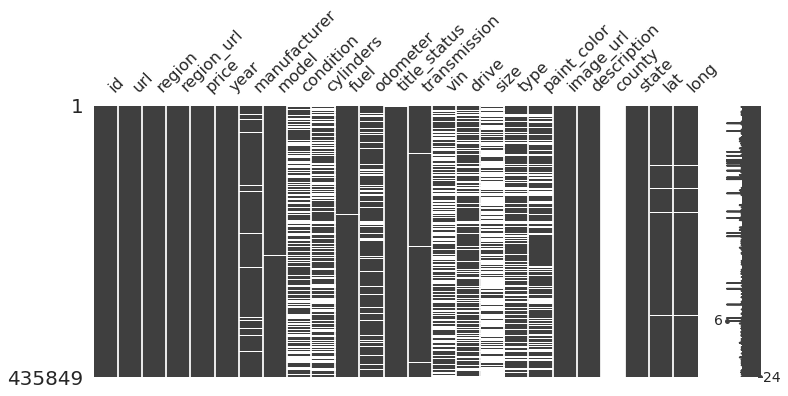

In [22]:
msno.matrix(df, figsize=(12, 5));

In [23]:
df_stats = pd.DataFrame((100 * (df.isnull().sum(axis=0) / len(df))), columns=['perc_missing'])
df_stats['n_uniques'] = [len(df[c].unique()) for c in df_stats.index]
df_stats['dtype'] = [df[c].dtype for c in df_stats.index]
df_stats = df_stats.sort_values(['perc_missing', 'n_uniques'])
df_stats

perc_missing  n_uniques    dtype
state             0.000000         51   object
region            0.000000        403   object
region_url        0.000000        413   object
price             0.000000      16742    int64
id                0.000000     435849    int64
url               0.000000     435849   object
image_url         0.005506     298803   object
description       0.006195     366892   object
year              0.256281        110  float64
title_status      0.414364          7   object
transmission      0.492372          4   object
fuel              0.686247          6   object
model             1.422282      33701   object
long              1.889416      48584  float64
lat               1.889416      49378  float64
manufacturer      4.760135         43   object
odometer         17.241751     108840  float64
type             26.868939         14   object
drive            27.993869          4   object
paint_color      31.030701         13   object
cylinders        38.174689          9   object
condition        42.860257          7   object
vin              45.119296     141547   object
size             67.904481          5   object
county          100.000000          1  float64

## Exercise 4: Data Cleaning

Based on the resulta of the previous exercise, observe that there are few cases:
- columns with no missing
- columns with few missing data (< 2%)
- columns with lots of missing data that can be dropped (> 20%)
- columns with lots of missng data but likely important features. (Manufacturer (5%) and Odometer (17%))


Create a new dataset called `dfclean`, starting from a copy of `df` and apply following procedures:
- drop columns with more than 20% missing data for now
- impute missing `odometer` with 0 and add indicator colum `odometer_missing` that is true when `odometer` has been imputed
- impute missing `manufacturer` with `unknown`
- impute missing `model` with `unknown`
- impute missing `description` with an empty string `''`

- drop rows with missing data from the remaining data
- drop columns with unique identifiers such as: `id`, `url` and `region_url`
- drop `image_url`. We could use images in a second stage, but let's ignore it for now

Once you're done, check `dfclean.info()`. It should read:

```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421257 entries, 0 to 435848
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            421257 non-null  object 
 1   price             421257 non-null  int64  
 2   year              421257 non-null  float64
 3   manufacturer      421257 non-null  object 
 4   model             421257 non-null  object 
 5   fuel              421257 non-null  object 
 6   odometer          421257 non-null  float64
 7   title_status      421257 non-null  object 
 8   transmission      421257 non-null  object 
 9   description       421257 non-null  object 
 10  state             421257 non-null  object 
 11  lat               421257 non-null  float64
 12  long              421257 non-null  float64
 13  odometer_is_null  421257 non-null  bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 45.4+ MB
``` 

In [24]:
dfclean = df.copy()

In [26]:
threshold = 20
drop_columns = list(df_stats[df_stats['perc_missing'] > threshold].index)
drop_columns.extend(['id', 'url', 'region_url', 'image_url'])
drop_columns

['type',
 'drive',
 'paint_color',
 'cylinders',
 'condition',
 'vin',
 'size',
 'county',
 'id',
 'url',
 'region_url',
 'image_url']

In [27]:
dfclean['odometer_is_null'] = dfclean['odometer'].isnull()
dfclean['odometer'] = dfclean['odometer'].fillna(0)

In [29]:
dfclean['manufacturer'].unique()

array(['jeep', 'bmw', 'dodge', 'chevrolet', 'unknown', 'ford', 'ram',
       'honda', 'toyota', 'nissan', 'subaru', 'gmc', 'volkswagen', 'kia',
       'acura', 'chrysler', 'hyundai', 'cadillac', 'volvo', 'mini',
       'mercedes-benz', 'audi', 'mazda', 'pontiac', 'buick', 'infiniti',
       'mitsubishi', 'rover', 'lincoln', 'lexus', 'fiat', 'jaguar',
       'mercury', 'saturn', 'datsun', 'porche', 'tesla',
       'harley-davidson', 'ferrari', 'land rover', 'alfa-romeo', 'morgan',
       'aston-martin'], dtype=object)

In [28]:
dfclean['manufacturer'] = dfclean['manufacturer'].fillna('unknown')
dfclean['model'] = dfclean['model'].fillna('unknown')
dfclean['description'] = dfclean['description'].fillna('')

In [30]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                435849 non-null  int64  
 1   url               435849 non-null  object 
 2   region            435849 non-null  object 
 3   region_url        435849 non-null  object 
 4   price             435849 non-null  int64  
 5   year              434732 non-null  float64
 6   manufacturer      435849 non-null  object 
 7   model             435849 non-null  object 
 8   condition         249043 non-null  object 
 9   cylinders         269465 non-null  object 
 10  fuel              432858 non-null  object 
 11  odometer          435849 non-null  float64
 12  title_status      434043 non-null  object 
 13  transmission      433703 non-null  object 
 14  vin               239197 non-null  object 
 15  drive             313838 non-null  object 
 16  size              13

In [31]:
dfclean = dfclean.drop(columns=drop_columns)

In [32]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            435849 non-null  object 
 1   price             435849 non-null  int64  
 2   year              434732 non-null  float64
 3   manufacturer      435849 non-null  object 
 4   model             435849 non-null  object 
 5   fuel              432858 non-null  object 
 6   odometer          435849 non-null  float64
 7   title_status      434043 non-null  object 
 8   transmission      433703 non-null  object 
 9   description       435849 non-null  object 
 10  state             435849 non-null  object 
 11  lat               427614 non-null  float64
 12  long              427614 non-null  float64
 13  odometer_is_null  435849 non-null  bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 43.6+ MB


In [33]:
dfclean = dfclean.dropna()

In [34]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421257 entries, 0 to 435848
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            421257 non-null  object 
 1   price             421257 non-null  int64  
 2   year              421257 non-null  float64
 3   manufacturer      421257 non-null  object 
 4   model             421257 non-null  object 
 5   fuel              421257 non-null  object 
 6   odometer          421257 non-null  float64
 7   title_status      421257 non-null  object 
 8   transmission      421257 non-null  object 
 9   description       421257 non-null  object 
 10  state             421257 non-null  object 
 11  lat               421257 non-null  float64
 12  long              421257 non-null  float64
 13  odometer_is_null  421257 non-null  bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 45.4+ MB


## Exercise 5: Pandas Profile Report

Use the `pp.ProfileReport(...)` function to generate a report about `dfclean` and read it. What other things can you say about the dataset?

In [35]:
pp.ProfileReport(dfclean)

## Exercise 6: Price data exploration

The `price` column is going to be the target of our regression models. Let's explore it first.

- Create a new variable called `y = dfclean['price']`
- Sort it and inspect the largest and smallest values. Do you notice anything strange?
- Plot the sorted price variable and see how it changes. Use a Log scale for better insights.
- Use a cumulative histogram to identify reasonable thresholds for minimum and maximum prices.

You should observe that there are 3 price regimes:
- roughly 10% of the cars have very low or zero price
- most of the remaining cars are between \$100 and \$100,000
- negligible fraction with price over \$100,000


Further dig into the cars with low price by visualizing some rows with price lower than \$100. You will notice that:

- Some of those rows are generic ads for a car dealer, not a specific vehicles
- Some of those rows contain scraping errors

=> remove rows with price < \$100 from `dfclean`

In [36]:
y = dfclean['price']

In [37]:
y_sorted = y.sort_values(ascending=False).reset_index(drop=True)
y_sorted.head()

0    3647256576
1    3333333333
2    3268562261
3    2989542968
4    2989542968
Name: price, dtype: int64

In [38]:
y_sorted.tail()

421252    0
421253    0
421254    0
421255    0
421256    0
Name: price, dtype: int64

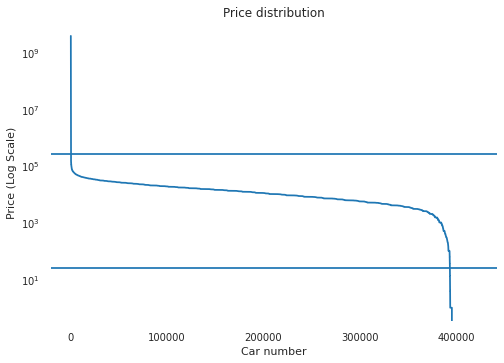

In [39]:
y_sorted.plot(logy=True)
plt.axhline(250000)
plt.axhline(25)
plt.title("Price distribution")
plt.ylabel("Price (Log Scale)")
plt.xlabel("Car number");

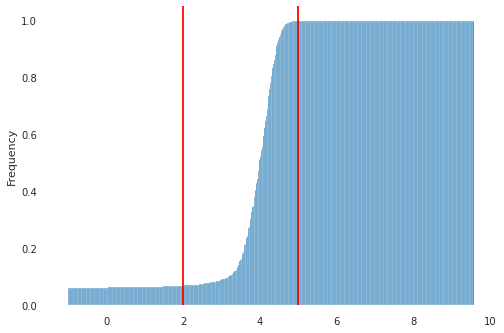

In [40]:
np.log10(y+0.1).plot.hist(bins=500, cumulative=True, density=True)
plt.axvline(np.log10(100), color='red')
plt.axvline(np.log10(100000), color='red');

In [41]:
dfclean[dfclean['price'] < 100].head(30)

region  price    year  ...      lat      long odometer_is_null
4            maine      0  2021.0  ...  44.4699  -68.8963             True
6            maine      0  2014.0  ...  42.7663  -71.2352            False
8     oregon coast      0  2012.0  ...  45.4072 -122.6250            False
13           maine      0  2016.0  ...  43.7811  -69.9955             True
21    oregon coast      0  2017.0  ...  45.4072 -122.6250            False
34    oregon coast      0  2008.0  ...  44.0442 -123.0030            False
37    oregon coast      0  2004.0  ...  45.4072 -122.6250            False
45    oregon coast      0  2015.0  ...  45.4072 -122.6250            False
96    oregon coast      0  2015.0  ...  45.1277 -122.8530            False
97    oregon coast      0  2014.0  ...  45.1277 -122.8530            False
98    oregon coast      0  2012.0  ...  45.1277 -122.8530            False
110          maine      0  2021.0  ...  44.6440  -69.5284             True
126          maine     99  2016.0  ...  42.7846  -71.2176            False
127          maine     99  2017.0  ...  43.2440  -71.4105            False
129          maine      0  2013.0  ...  43.8365  -69.9140            False
136   oregon coast      0  2016.0  ...  45.1277 -122.8530            False
137   oregon coast      0  2014.0  ...  45.1277 -122.8530            False
142   oregon coast      0  2019.0  ...  45.1277 -122.8530            False
153  mohave county      0  2020.0  ...  34.1500 -114.2890             True
158   oregon coast      0  2018.0  ...  45.1277 -122.8530            False
173   oregon coast      0  2014.0  ...  45.1277 -122.8530            False
183          maine     99  2019.0  ...  43.2440  -71.4105            False
188  south florida     25  2011.0  ...  25.8493  -80.2434            False
195          maine     99  2016.0  ...  42.7846  -71.2176            False
199   oregon coast      0  2006.0  ...  45.1277 -122.8530            False
200   oregon coast      0  2003.0  ...  45.1277 -122.8530            False
228          maine      0  2014.0  ...  43.8365  -69.9140            False
249  south florida      0  2015.0  ...  26.0697  -80.2246             True
255          maine     99  2017.0  ...  43.2440  -71.4105            False
265   oregon coast      0  1999.0  ...  45.4072 -122.6250            False

[30 rows x 14 columns]

In [42]:
dfclean = dfclean[dfclean['price'] > 100]

## Exercise 7: Numerical features

Let's explore the numerical features, their ranges and their distributions.

- create a variable `num_columns` that contains the names of the numerical columns. You can find them with the `.select_dtypes` method
- use the `.describe` method to see what the minimum and maximum values are for each of them.
- Plot a histogram for each of the numerical features
- If the feature is extremely skewed try plotting the histogram of `np.log10(feature + 1)` for better visualization.
- BONUS: display all the plots in the same figure using `plt.subplot`

In [43]:
num_columns = dfclean.select_dtypes(include='number').columns
dfclean[num_columns].describe()

price           year      odometer            lat           long
count  3.919740e+05  391974.000000  3.919740e+05  391974.000000  391974.000000
mean   1.495537e+05    2009.604747  8.380134e+04      38.501555     -94.869589
std    1.782973e+07       9.384092  1.104656e+05       6.077934      18.031661
min    1.020000e+02    1900.000000  0.000000e+00     -83.197100    -177.012000
25%    5.900000e+03    2007.000000  2.285425e+04      34.299800    -111.236000
50%    1.099500e+04    2012.000000  7.677600e+04      39.090000     -89.460400
75%    1.879000e+04    2015.000000  1.270000e+05      42.525400     -81.410300
max    3.647257e+09    2021.000000  1.000000e+07      79.601900     173.675000

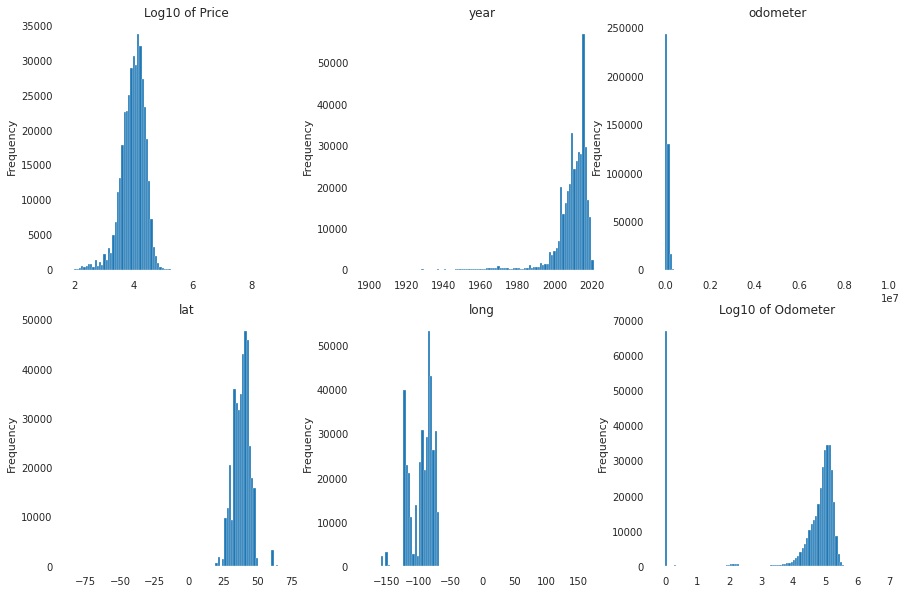

In [44]:
plt.figure(figsize=(15, 10))

ax = plt.subplot(2, 3, 1)
np.log10(dfclean['price'] + 1).plot.hist(bins=100, title="Log10 of Price", ax=ax);

for i, c in enumerate(num_columns[1:]):
  ax = plt.subplot(2, 3, i+2)
  dfclean[c].plot.hist(bins=100, title=c, ax=ax)

ax = plt.subplot(2, 3, 6)
np.log10(dfclean['odometer'] + 1).plot.hist(bins=100, title="Log10 of Odometer", ax=ax);

## Exercise 8: Categorical features

- Create a new variable called `cat_columns` that contains the features with categorical data (not numbers)
- Similarly to how you did for `df`, calculate the cardinality of each column, i.e. the number of distinct values.

Observe that there are 2 types of categorical columns:
- low cardinality (x <= 450) => we will 1-hot-encode these
- high cardinality (> 30000) => we will hashing, vectorize or embeddings to treat these.

In [45]:
cat_columns = dfclean.select_dtypes(exclude='number').columns

res = [[c, len(dfclean[c].unique())] for c in cat_columns]

df_distinct = pd.DataFrame(res, columns=['column', 'n_distinct'])\
  .set_index('column').sort_values('n_distinct')

df_distinct

n_distinct
column                      
odometer_is_null           2
transmission               3
fuel                       5
title_status               6
manufacturer              43
state                     51
region                   403
model                  31414
description           332193

## Exercise 9: Map

Display a map with a sample of 10000 cars.
- Use the `px.scatter_mapbox` function
- Use `df.sample` to extract a sample
- Use the `lat` and `long` columns

You will observe that cars are mostly in the US, with very few outliers

In [ ]:
fig = px.scatter_mapbox(df.sample(10000), lat="lat", lon="long",
                  color_continuous_scale=px.colors.cyclical.IceFire,
                  zoom=2,
                  mapbox_style="carto-positron",
                  width=1500,
                  height=500)
fig.show()

## Exercise 10: Outliers

Let's further investigate outliers.

- Display a scatter plot of `price` VS `year` and notice that there are some cars with extremely high prices.
- Look at some of the rows where price > \$100,000

Notice that:
- in some cases it's probably missing the cents dot (adding two digits at the price)
- in some cases its clearly nonsense (111111, 121212)
- in some cases it may be a luxury or old car
- in some cases it may be a mistake

it's less than 500 cars total

=> drop all cars with price > \$100,000 for now

- Draw a new scatter plot of `price` VS `year` to see if you notice any trend.
- BONUS: use the `sns.boxplot` function for fancier plots
- BONUS: repeat the plots using `np.log10(price)` VS `year`

In [46]:
from matplotlib.patches import Ellipse

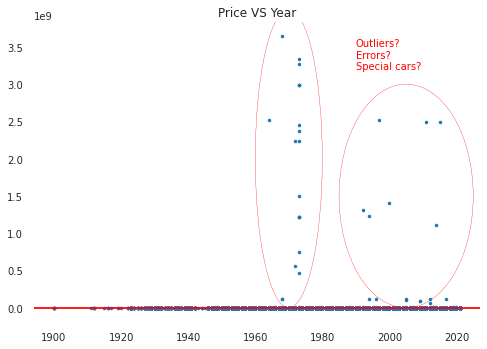

In [47]:
c1 = Ellipse((1970,2e9), width=20, height=4e9, color='red', fill=False)
c2 = Ellipse((2005,1.5e9), width=40, height=3e9, color='red', fill=False)
ax = plt.gca()
ax.plot(dfclean['year'], dfclean['price'], '.')
ax.axhline(100000, color='red')
ax.add_artist(c1)
ax.add_artist(c2)
ax.text(1990, 3.2e9, "Outliers?\nErrors?\nSpecial cars?", color='red')
plt.title("Price VS Year");

In [48]:
dfclean[dfclean['price'] > 100000]

region   price  ...      long odometer_is_null
690               birmingham  142500  ...  -84.4759             True
2724                 phoenix  143000  ... -111.9370            False
4684             space coast  111111  ...  -80.6020             True
9142               iowa city  149000  ...  -92.3250            False
9925                 vermont  149000  ...  -73.2022            False
...                      ...     ...  ...       ...              ...
430611       medford-ashland  174997  ... -122.5380            False
431888            shreveport  142500  ...  -84.4759             True
433081           new orleans  169991  ...  -96.9186            False
433325            shreveport  121212  ... -111.2730             True
433443  greenville / upstate  126000  ...  -82.4002            False

[499 rows x 14 columns]

In [49]:
dfclean = dfclean[dfclean['price'] <= 100000]

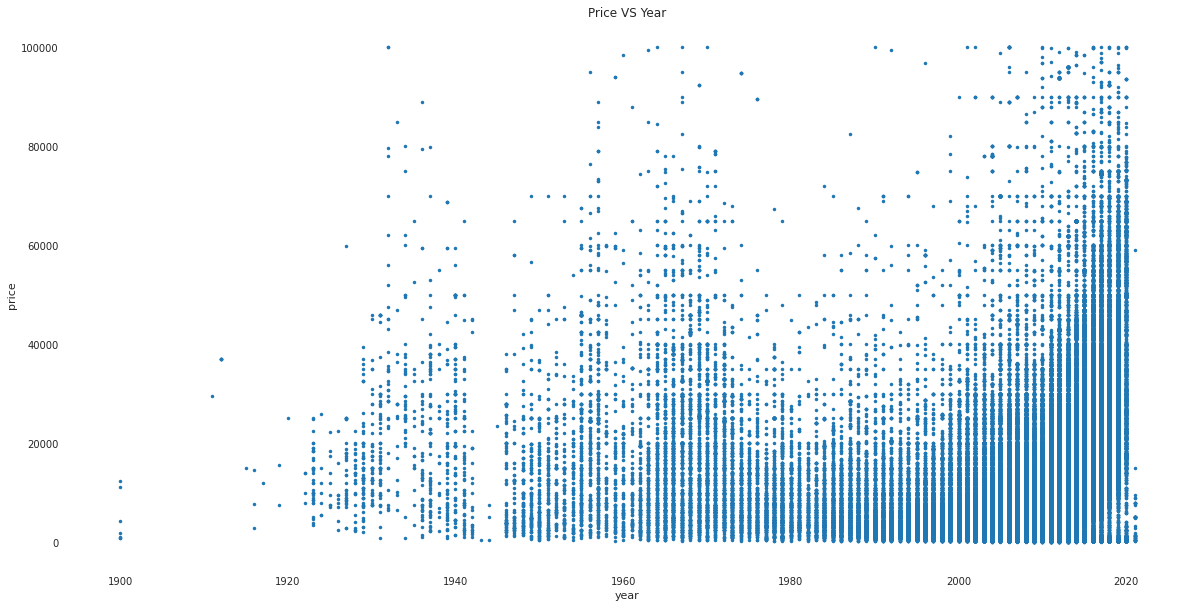

In [50]:
plt.figure(figsize=(20,10))
plt.plot(dfclean['year'], dfclean['price'], '.');
plt.xlabel('year')
plt.ylabel('price')
plt.title("Price VS Year");

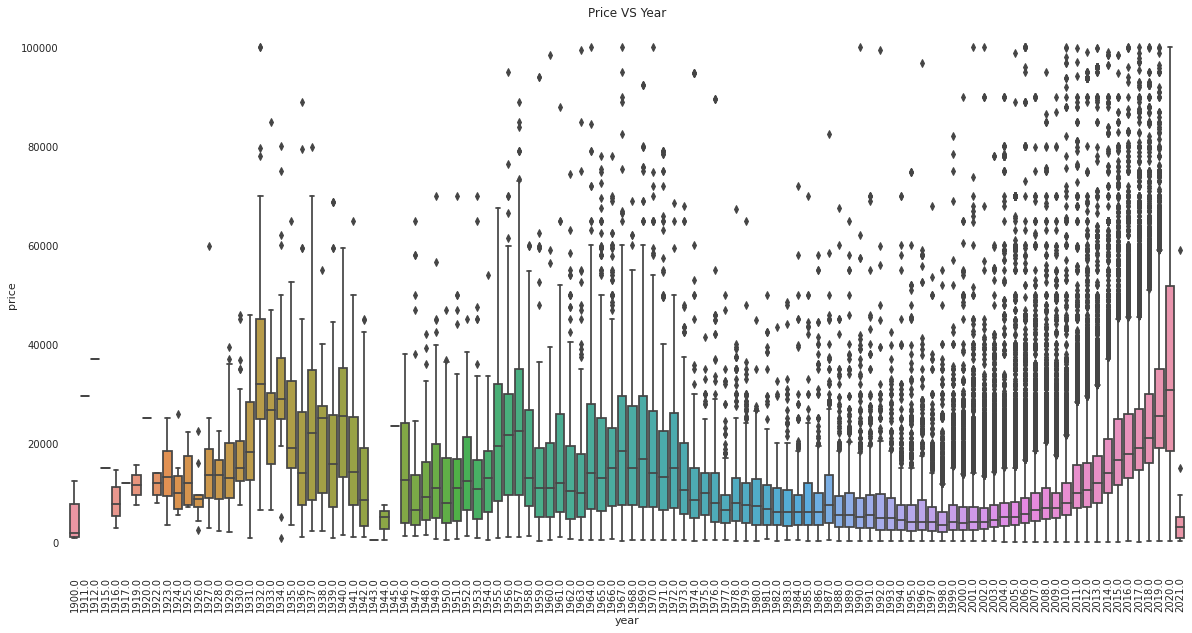

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(x="year", y="price", data=dfclean)
plt.xticks(rotation= 90)
plt.title("Price VS Year");

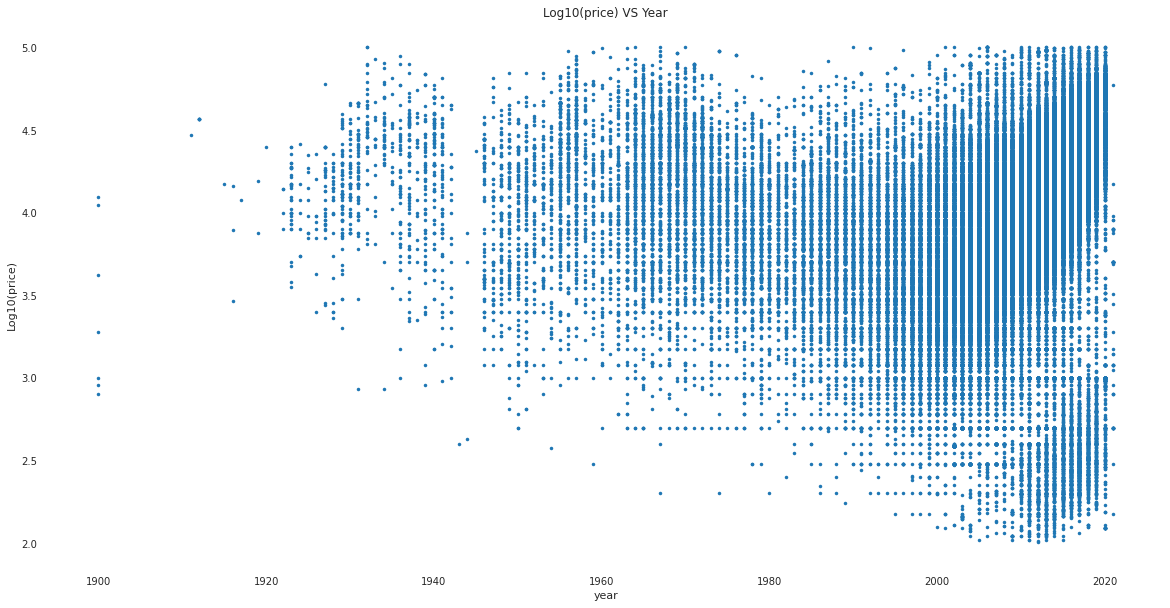

In [52]:
plt.figure(figsize=(20,10))
plt.plot(dfclean['year'], np.log10(dfclean['price']), '.');
plt.xlabel('year')
plt.ylabel('Log10(price)')
plt.title("Log10(price) VS Year");

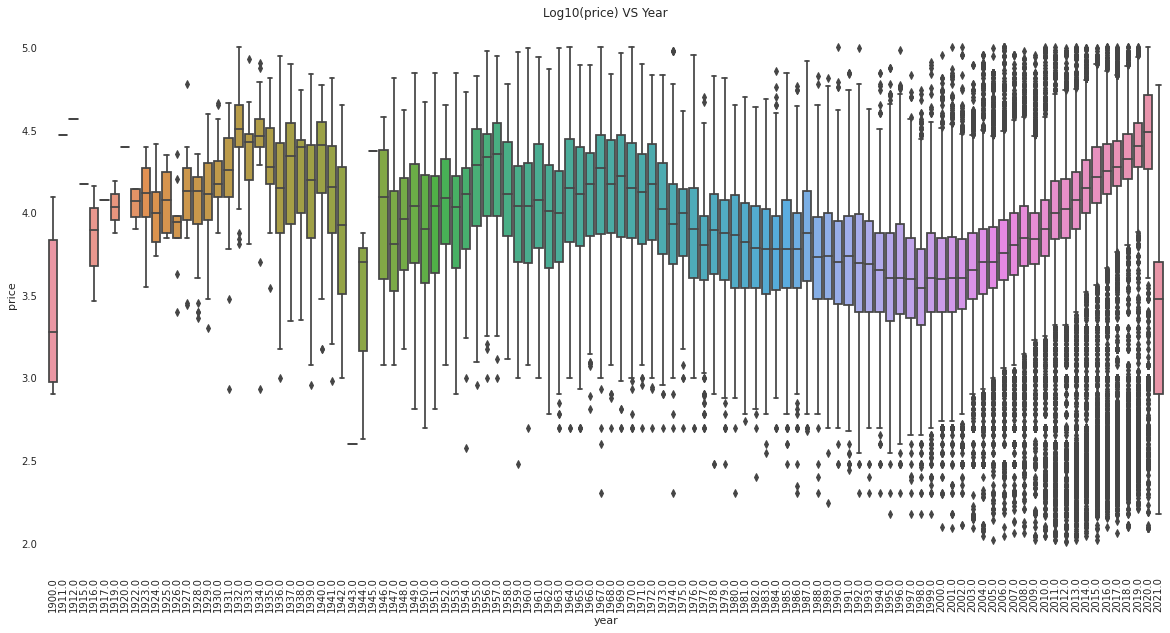

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(x="year", y=np.log10(dfclean["price"]), data=dfclean)
plt.xticks(rotation= 90)
plt.title("Log10(price) VS Year");

## Exercise 11: Odometer inspection

- Display a scatter plot of `price` VS `log10(odometer)` and of `log10(price)` VS `log10(odometer)` to see if there's any correlation
- Use a `sns.barplot` to display the average odometer for each car `manufacturer`
- Notice that there's a distinct group of cars with odometer < 500
- Inspect some rows for that group. Can you guess what happened there?
- Decide what to do with those rows. Will you impute them? Will you ignore them? Will you drop them?

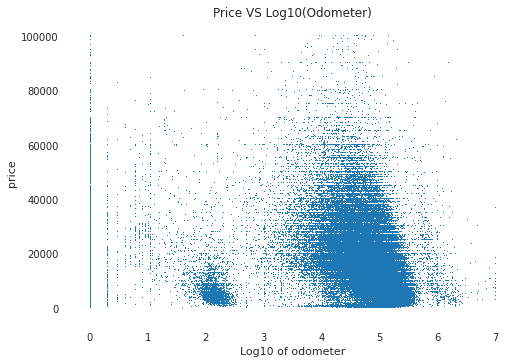

In [54]:
plt.plot(np.log10(dfclean['odometer']+1), dfclean['price'], ',')
plt.xlabel('Log10 of odometer')
plt.ylabel('price')
plt.title("Price VS Log10(Odometer)");

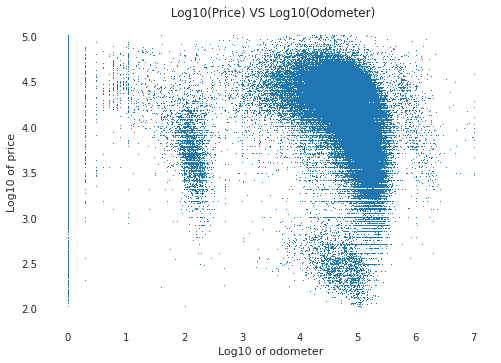

In [55]:
plt.plot(np.log10(dfclean['odometer']+1), np.log10(dfclean['price']), ',')
plt.xlabel('Log10 of odometer')
plt.ylabel('Log10 of price')
plt.title(" Log10(Price) VS Log10(Odometer)");

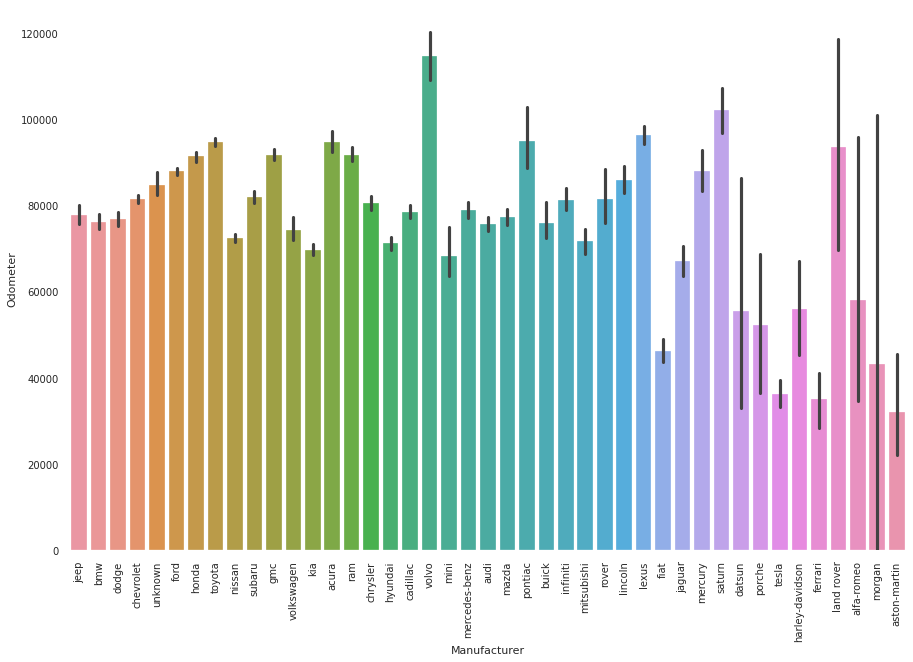

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(x=dfclean['manufacturer'], y=dfclean['odometer'])
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer');

In [57]:
dfclean[dfclean['odometer'] < 500]

region  price    year  ...      lat      long odometer_is_null
0       mohave county   3495  2012.0  ...  34.4554 -114.2690             True
5               maine    500  2010.0  ...  42.8424  -71.1077             True
11      south florida   1499  2016.0  ...  25.8130  -80.2320             True
14      mohave county   4995  2009.0  ...  34.5575 -114.3310             True
15      mohave county  10988  2011.0  ...  34.5575 -114.3310             True
...               ...    ...     ...  ...      ...       ...              ...
435829       portland   9995  2007.0  ...  45.4096 -122.5690             True
435830  south florida  34677  2018.0  ...  25.8130  -80.2320             True
435833      milwaukee   6599  2014.0  ...  46.4638  -90.1588             True
435835   oregon coast   2995  2004.0  ...  45.4248 -122.6330             True
435837      milwaukee   5999  2012.0  ...  46.4638  -90.1588             True

[71969 rows x 14 columns]

Most likely odometers < 500 are in thousands of miles instead of miles. Impute later, ignore for now and leave as is.

In [ ]:
dfclean[dfclean['price'] < 1000]

region  price    year  ... state      lat      long
303      oregon coast    999  2010.0  ...    or  44.0460 -122.9770
395           phoenix    800  2004.0  ...    az  33.5818 -112.1340
511      oregon coast    999  2004.0  ...    or  44.0460 -122.9770
644      oregon coast    750  1999.0  ...    or  43.3600 -124.1320
1013    daytona beach    637  2018.0  ...    fl  29.2353  -81.0658
...               ...    ...     ...  ...   ...      ...       ...
435375     san marcos    950  2013.0  ...    tx  29.9966  -97.8335
435417  south florida    351  2016.0  ...    fl  25.8577  -80.2101
435430  south florida    168  2016.0  ...    fl  25.8577  -80.2101
435431  south florida    236  2015.0  ...    fl  25.8577  -80.2101
435745   oregon coast    975  2007.0  ...    or  44.0460 -122.9770

[4356 rows x 13 columns]

## Exercise 12: Naive Machine Learning

Let's build our first machine learning model. It will most likely be very bad, but it will allow us to close the loop, defining a metric and a baseline.

### Part 1: Baseline

- Create a new variable called `y` that contains the `price` and drop `price` from `dfclean`
- Create a baseline model that always predicts the average price
- Score the model with:
  - Mean Squared Error
  - Mean Absolute Error
  - Mean Absolute Percentage Error (MAPE): use this function:
  ```python
  def mape(y_true, y_pred): 
      mask = (y_true != 0)
      return (np.fabs(y_true - y_pred)/y_true)[mask].mean() 
  ```
  - R2 Score
  - Plot of `y_predicted` VS `y_true`

In [45]:
y = dfclean.pop('price')

In [46]:
y_baseline = np.mean(y) * np.ones(len(y))

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
def mape(y_true, y_pred): 
  mask = (y_true != 0)
  return (np.fabs(y_true - y_pred)/y_true)[mask].mean() 

In [49]:
mean_squared_error(y, y_baseline)

121074739.3210262

In [50]:
mean_absolute_error(y, y_baseline)

8217.295079682557

In [51]:
mape(y, y_baseline)

1.8269161419847098

In [52]:
r2_score(y, y_baseline)

0.0

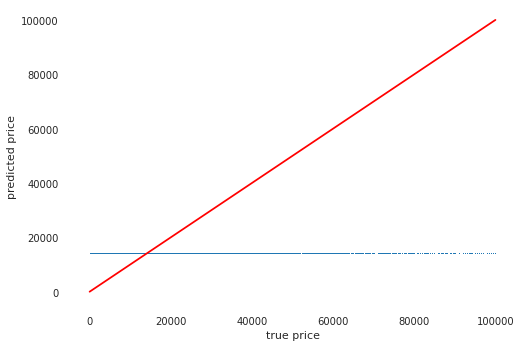

In [53]:
plt.plot(y, y_baseline, ',')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('true price')
plt.ylabel('predicted price');

### Part 2: Linear Regression

- Use the `LinearRegression` class from Scikit Learn
- Build a simple model that uses only `year` and `odometer` as features
- Evaluate the model with all the scores used for the baseline

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()

X = dfclean[['year', 'odometer']]
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_predicted = model.predict(X)

In [57]:
mean_squared_error(y, y_predicted)

109109542.7814802

In [58]:
mean_absolute_error(y, y_predicted)

7529.301634857814

In [59]:
mape(y, y_predicted)

1.7205393436149443

In [60]:
r2_score(y, y_predicted)

0.09882487962927289

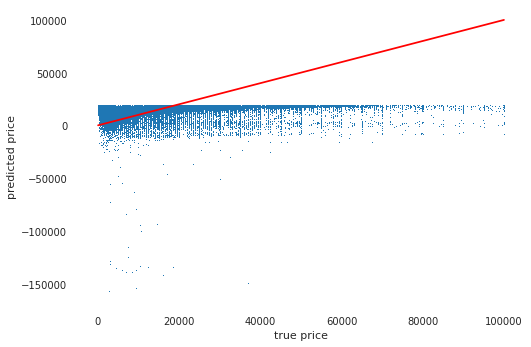

In [61]:
plt.plot(y, y_predicted, ',')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('true price')
plt.ylabel('predicted price');

In [62]:
model.coef_

array([ 3.15808859e+02, -1.43064105e-02])

In [63]:
model.intercept_

-619655.4026597561

## Exercise 13: Ideas

Now that you've created your first model, make a list of idea of things that you could try in order to improve the model. These ideas could involve:
- data manipulation
- feature engineering
- model selection
- tooling and infrastructure

Generate at least 10-15 ideas.

- predict the log10 of price
- feature columns
- better imputation of missing values
- try various models (svm, xgboost, neural nets)
- encode categorical features
- function for whole pipeline (tools)
- separate model for outliers
- train test split
- cross validation
- vectorize high cardinality features
- text vectorize description
- bin lat / lon
- log10 of odometer
- convert years in delta from 2020 (car age)
- small sample for fast train & iteration
- learning curve for best model
- hyperparameter search for best model
- ...

## Exercise 14: Assessing ideas

Bucket your ideas into 3 groups:
- EASY. These should be straightforward to code if you know the API and their execution should not take more than a few minutes.
- MEDIUM. These could take a little longer to code and may take a bit more to execute. The whole experiment should be achievable within a few hours.
- HARD. These are good ideas that are time consuming, either because the implementation is not straightforward, or because decision are involved (e.g. how to impute missing data or how to better deal with outliers) or because their evaluation will take a long time.

- Make a plan of your next steps that involves doing all the easy ideas and possibly some of the medium ideas


- predict the log10 of price => easy
- train test split => easy
- small sample for fast train & iteration => easy
- function for whole pipeline (tools) => easy
- encode categorical features => easy
- log10 of odometer => easy
- try various models (svm, xgboost, neural nets) => easy
- convert years in delta from 2020 (car age)=> easy
- feature columns => easy

----
- hyperparameter search for best model = medium
- vectorize high cardinality features => medium
- text vectorize description => medium
- bin lat / lon => medium
- learning curve for best model => medium

----
- better imputation for missing values => hard & not necessary
- data cleaning => time consuming
- separate model for outliers => time consuming, not necessary
- cross validation => overkill for now
- ...

## Exercise 15: First and easiest idea

My first and easiest idea is to predict the Log10 of prices and perform a Train / Val / Test split. I will also create a small sample X_sample to allow for quick experimentation.

My sample sizes will be:

```
Train set size: 351475 | 80.6% of original df
Validation set size: 20000 | 4.59% of original df
Test set size: 20000 | 4.59% of original df

Small Training sample size: 35147 | 10.0% of training set
```

You can go ahead and implement your first and easiest idea or follow along and implement this one.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
test_size = 20000

df_train_val, df_test, y_train_val, y_test = train_test_split(dfclean, np.log10(y), test_size=test_size, random_state=0)
df_train, df_val, y_train, y_val = train_test_split(df_train_val, y_train_val, test_size=test_size, random_state=0)

df_sample, _, y_sample, _ = train_test_split(df_train, y_train, train_size=0.1, random_state=0)

print("Dropped data: {} | {:0.3}% of total.".format(len(df) - len(dfclean), (1 - len(dfclean)/len(df))*100))
print("Train set size: {} | {:0.3}% of total.".format(len(df_train), len(df_train)/len(df)*100))
print("Validation set size: {} | {:0.3}% of total.".format(len(df_val), len(df_val)/len(df)*100))
print("Test set size: {} | {:0.3}% of total.".format(len(df_test), len(df_test)/len(df)*100))
print("Small Training sample size: {} | {:0.3}% of training set.".format(len(df_sample), len(df_sample)/len(df_train)*100))

Dropped data: 44374 | 10.2% of total.
Train set size: 351475 | 80.6% of total.
Validation set size: 20000 | 4.59% of total.
Test set size: 20000 | 4.59% of total.
Small Training sample size: 35147 | 10.0% of training set.


## Exercise 16: Next idea

Let's build some tools that will facilitate assessing other ideas. In particular build a `train_val_model` function with the signature:

```python
def train_val_model(model, model_name, X_train, y_train, X_val, y_val):
    ....
    ....
    return pd.DataFrame(results,
                        columns=[model_name],
                        index=['model',
                               'r2_score_train', 'r2_score_val',
                               'mape_train', 'mape_val',
                               'mse_train', 'mse_val',
                               'mae_train', 'mae_val',
                               'train_time', 'pred_time'])
```

Feel free to implement your next easiest idea or follow along and implement this one.

In [66]:
from time import time

In [67]:
def calculate_scores(y_true, y_pred):
  r2_s = r2_score(y_true, y_pred)
  mse_s = mean_squared_error(y_true, y_pred)
  mae_s = mean_absolute_error(y_true, y_pred)
  mape_s = mape(y_true, y_pred)
  return r2_s, mse_s, mae_s, mape_s

def calculate_scores_train_val(y_train, y_pred_train, y_val, y_pred_val):
  r2_s_t, mse_s_t, mae_s_t, mape_s_t = calculate_scores(y_train, y_pred_train)
  r2_s_v, mse_s_v, mae_s_v, mape_s_v = calculate_scores(y_val, y_pred_val)
  return (r2_s_t,
          r2_s_v,
          mape_s_t,
          mape_s_v,
          mse_s_t,
          mse_s_v,
          mae_s_t,
          mae_s_v)

def train_val_model(model, model_name, X_train, y_train, X_val, y_val):
  t0 = time()
  model.fit(X_train, y_train)
  t1 = time()

  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)
  t2 = time()
  (r2_s_t,
   r2_s_v,
   mape_s_t,
   mape_s_v,
   mse_s_t,
   mse_s_v,
   mae_s_t,
   mae_s_v) = calculate_scores_train_val(y_train, y_pred_train, y_val, y_pred_val)

  results = [
    model,
    r2_s_t,
    r2_s_v,
    mape_s_t,
    mape_s_v,
    mse_s_t,
    mse_s_v,
    mae_s_t,
    mae_s_v,
    t1 - t0, t2 - t1
  ]
  
  return pd.DataFrame(results,
                      columns=[model_name],
                      index=['model',
                             'r2_score_train', 'r2_score_val',
                             'mape_train', 'mape_val',
                             'mse_train', 'mse_val',
                             'mae_train', 'mae_val',
                             'train_time', 'pred_time'])

In [68]:
train_val_model(LinearRegression(), "lr_on_year", 
                df_sample[['year']], y_sample, 
                df_val[['year']], y_val)

lr_on_year
model           LinearRegression(copy_X=True, fit_intercept=Tr...
r2_score_train                                           0.110194
r2_score_val                                            0.0958945
mape_train                                              0.0729548
mape_val                                                 0.073695
mse_train                                                0.138075
mse_val                                                  0.142507
mae_train                                                0.274412
mae_val                                                   0.27726
train_time                                             0.00365543
pred_time                                              0.00178695

## Exercise 17: Next idea

Let's 1-hot encode the categorical columns with more than 2 and less than 500 distinct values.

- You can use `ColumnTransformer` and `OneHotEncoder` transformers or `pd.get_dummies`.
- You can also calculate following 3 additional features at this stage:
  - the car age as 2020 - year
  - the Log10 of odometer
  - the `odometer_is_null` indicator column

Feel free to implement your next easiest idea or follow along and implement this one.

If you decide to implement this idea, check the shape of your `X_train` dataset. After 1-hot encoding it should be:

`X_train.shape: (351475, 514)`

In [69]:
df_distinct

n_distinct
column                      
odometer_is_null           2
transmission               3
fuel                       5
title_status               6
manufacturer              43
state                     51
region                   403
model                  31414
description           332193

In [70]:
to_encode = df_distinct[(df_distinct['n_distinct'] > 2) & (df_distinct['n_distinct'] < 500)].index
to_encode

Index(['transmission', 'fuel', 'title_status', 'manufacturer', 'state',
       'region'],
      dtype='object', name='column')

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, KBinsDiscretizer, QuantileTransformer

In [72]:
[c for c in dfclean.columns if c not in to_encode]

['year', 'model', 'odometer', 'description', 'lat', 'long', 'odometer_is_null']

In [73]:
class FunctionTransformerWithName(FunctionTransformer):
  def __init__(self, func, feature_names=None):
    super(FunctionTransformerWithName, self).__init__(func=func)
    self.feature_names = feature_names
  
  def get_feature_names(self):
    return self.feature_names

In [74]:
class PassthroughTransformer(FunctionTransformer):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        self.X = X
        return X

    def get_feature_names(self):
        return self.X.columns.tolist()

In [75]:
column_transformer = ColumnTransformer(
    [(c, OneHotEncoder(dtype='int'), [c]) for c in to_encode] +
    [('car_age', FunctionTransformerWithName(feature_names=['car_age'], func=lambda x: 2020 - x), ['year']),
     ('log10_odometer', FunctionTransformerWithName(feature_names=['log10_odometer'], func=lambda x: np.log10(x+1)), ['odometer']),
     ('odometer_is_null', PassthroughTransformer(), ['odometer_is_null'])])

In [76]:
column_transformer

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('transmission',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype='int',
                                               handle_unknown='error',
                                               sparse=True),
                                 ['transmission']),
                                ('fuel',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype='int',
                                               handle_unknown='error',
                                               sparse=True),
                                 ['fuel']),
                                ('title_sta...
                                                             func=<function <lambda> at 0x7f6b809ccae8>),
        

In [77]:
X_train = column_transformer.fit_transform(df_train)
X_val = column_transformer.transform(df_val)
X_test = column_transformer.transform(df_test)
X_sample = column_transformer.transform(df_sample)
X_train_val = column_transformer.transform(df_train_val)

In [78]:
feature_names = column_transformer.get_feature_names()

In [79]:
len(feature_names)

514

In [80]:
X_train.shape

(351475, 514)

## Exercise 18: Next idea

New baseline.

Use a `DummyRegressor` to create a new baseline model and score it.

In [81]:
from sklearn.dummy import DummyRegressor

In [82]:
df_results = train_val_model(DummyRegressor(),
                             "dummy", 
                             X_train, y_train, 
                             X_val, y_val)
df_results

dummy
model           DummyRegressor(constant=None, quantile=None, s...
r2_score_train                                                  0
r2_score_val                                         -5.17713e-07
mape_train                                              0.0811563
mape_val                                                  0.08139
mse_train                                                0.156662
mse_val                                                  0.157622
mae_train                                                0.306078
mae_val                                                  0.307058
train_time                                             0.00178552
pred_time                                              0.00254583

## Exercise 19: Next idea

Let's iterate on different models and see which one has the best performance. Feel free to implement this one or your next best idea.

To iterate on models:
- Load all the necessary model classes from `sklearn`, `xgboost`, `lightgbm`
- Make a list of model instances
- Iterate on the model instances:
  - train the models on `X_train` or on `X_sample` for convenience
  - evaluate the models on `X_val`
  - accumulate your results in a DataFrame called `df_results` so that they are easy to compare

In [83]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [84]:
models = [
          LinearRegression(),
          Ridge(),
          Lasso(),
          ElasticNet(),
          SGDRegressor(),
          DecisionTreeRegressor(),
          XGBRegressor(objective='reg:squarederror', n_jobs=-1),
          LGBMRegressor(),
          MLPRegressor(hidden_layer_sizes=(1000, 100), max_iter=10, verbose=True, early_stopping=True, validation_fraction=0.0001),
          # RandomForestRegressor(n_jobs=-1, max_depth=30, min_samples_split=4),
          # ExtraTreesRegressor(n_jobs=-1),
          # SVR(),
]

In [85]:
for model in models:
  mname = model.__class__.__name__
  try:
    df_results[mname] = train_val_model(model,
                                        mname, 
                               X_sample, y_sample, 
                               X_val, y_val)
    print(mname, "OK")
  except Exception as ex:
    print(mname, ex)
  print("Train time: ", df_results.loc['train_time', mname])

LinearRegression OK
Train time:  0.7610273361206055
Ridge OK
Train time:  0.04855966567993164
Lasso OK
Train time:  0.08877897262573242
ElasticNet OK
Train time:  0.09161925315856934
SGDRegressor OK
Train time:  0.186720609664917
DecisionTreeRegressor OK
Train time:  5.377033472061157
XGBRegressor OK
Train time:  1.5701167583465576
LGBMRegressor OK
Train time:  0.5083518028259277
Iteration 1, loss = 0.30858615
Validation score: -2.996456
Iteration 2, loss = 0.04295376
Validation score: -1.958601
Iteration 3, loss = 0.03924959
Validation score: 0.694773
Iteration 4, loss = 0.03760216
Validation score: -0.268656
Iteration 5, loss = 0.03533010
Validation score: -1.082021
Iteration 6, loss = 0.03564161
Validation score: 0.613259
Iteration 7, loss = 0.03235045
Validation score: 0.495520
Iteration 8, loss = 0.03227837
Validation score: -0.544838
Iteration 9, loss = 0.02975106
Validation score: 0.724388
Iteration 10, loss = 0.02852502
Validation score: 0.602077


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.



MLPRegressor OK
Train time:  60.26212239265442


In [86]:
df_results.transpose().sort_values('r2_score_val', ascending=False).round(3)

model  ...   pred_time
LGBMRegressor          LGBMRegressor(boosting_type='gbdt', class_weig...  ...    0.262038
MLPRegressor           MLPRegressor(activation='relu', alpha=0.0001, ...  ...     1.60467
XGBRegressor           XGBRegressor(base_score=0.5, booster='gbtree',...  ...    0.211343
DecisionTreeRegressor  DecisionTreeRegressor(ccp_alpha=0.0, criterion...  ...   0.0281646
Ridge                  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...  ...  0.00208616
LinearRegression       LinearRegression(copy_X=True, fit_intercept=Tr...  ...  0.00221896
SGDRegressor           SGDRegressor(alpha=0.0001, average=False, earl...  ...  0.00161052
ElasticNet             ElasticNet(alpha=1.0, copy_X=True, fit_interce...  ...   0.0015626
Lasso                  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...  ...  0.00151873
dummy                  DummyRegressor(constant=None, quantile=None, s...  ...  0.00254583

[10 rows x 11 columns]

## Exercise 20: Next idea

Best model tuning. Let's look for the best combination of hyperparameters in the best model. The best performance was achieved with a `LGBMRegressor` with default parameters. Let's look for the best hyperparameter combination using 2 tricks:

- Let's leverage the fact that LightGBM can understand categorical columns. We will create a new set of features where categorical columns are encoded with `OrdinalEncoder` instead of `OneHotEncoder`.
- We will create a `lightgbm.Dataset` with these features and train the model setting the `categorical_feature=` parameter
- Let's further optimize the model using the `Optuna` package. We can follow the [example code](https://github.com/optuna/optuna/blob/master/examples/lightgbm_tuner_simple.py).

Feel free to continue with your ideas or try to implement this one.

Create categorical features with ordinal encoding:

In [87]:
from sklearn.preprocessing import OrdinalEncoder

In [88]:
column_transformer_2a = ColumnTransformer(
    [(c, OrdinalEncoder(dtype='int'), [c]) for c in to_encode]
)
column_transformer_2b = ColumnTransformer(
    [('car_age', FunctionTransformerWithName(feature_names=['car_age'], func=lambda x: 2020 - x), ['year']),
     ('log10_odometer', FunctionTransformerWithName(feature_names=['log10_odometer'], func=lambda x: np.log10(x+1)), ['odometer']),
     ('odometer_is_null', PassthroughTransformer(), ['odometer_is_null'])]
)

In [89]:
X_train_2a = pd.DataFrame(column_transformer_2a.fit_transform(df_train), columns=to_encode)

In [90]:
X_train_2a.head()

column  transmission  fuel  title_status  manufacturer  state  region
0                  0     2             0            26      4     350
1                  0     2             0            18      1      29
2                  0     2             2             7     30     231
3                  0     2             0            26     10      15
4                  1     2             4            20     27     394

In [91]:
X_train_2b = pd.DataFrame(column_transformer_2b.fit_transform(df_train), 
                          columns=['car_age', 'log10_odometer', 'odometer_is_null'])

In [92]:
X_train_2 = pd.concat([X_train_2a, X_train_2b], axis=1)

In [93]:
def transform(df):
  x_2a = pd.DataFrame(column_transformer_2a.transform(df),
                      columns=to_encode)
  x_2b = pd.DataFrame(column_transformer_2b.transform(df),
                      columns=['car_age', 'log10_odometer', 'odometer_is_null'])
  return pd.concat([x_2a, x_2b], axis=1)

Transform the validation, test and sample sets:

In [94]:
X_val_2 = transform(df_val)
X_test_2 = transform(df_test)
X_sample_2 = transform(df_sample)

Test a model with default parameters. We will use the "Huber" loss as our objective

In [95]:
import lightgbm as lgb

In [96]:
params = {
        "objective": "huber",
        "metric": "huber",
        "verbosity": -1,
        "boosting_type": "gbdt",
}

In [97]:
ds_train = lgb.Dataset(X_train_2, label=y_train.values)
ds_sample = lgb.Dataset(X_sample_2, label=y_sample.values)
ds_val = lgb.Dataset(X_val_2, label=y_val.values)

In [98]:
t0 = time()
model = lgb.train(params, ds_train, categorical_feature=list(to_encode))
t1 = time()

y_pred_2 = model.predict(X_train_2)
y_pred_2_val = model.predict(X_val_2)
t2 = time()

scores = calculate_scores_train_val(y_train, y_pred_2, y_val, y_pred_2_val)

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning:

categorical_feature in Dataset is overridden.
New categorical_feature is ['fuel', 'manufacturer', 'region', 'state', 'title_status', 'transmission']



In [99]:
df_results['lgtbm_cat_columns'] = [model] + list(scores) + [t1 - t0, t2 - t1]

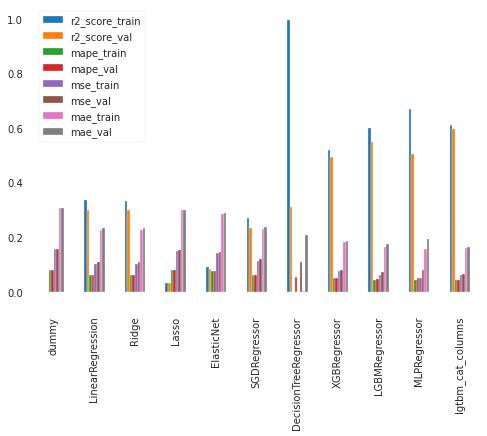

In [100]:
df_results.transpose()[["r2_score_train", "r2_score_val",
                     "mape_train", "mape_val",
                     "mse_train", "mse_val",
                     "mae_train", "mae_val"]].plot.bar();

Hyperparameter tuning with Optuna

In [101]:
import optuna.integration.lightgbm as lgbo

In [102]:
ds_train = lgbo.Dataset(X_train_2, label=y_train.values)
ds_sample = lgbo.Dataset(X_sample_2, label=y_sample.values)
ds_val = lgbo.Dataset(X_val_2, label=y_val.values)

In [103]:
t0 = time()

model = lgbo.train(
        params,
        ds_train,
        valid_sets=[ds_val],
        verbose_eval=100,
        early_stopping_rounds=50,
        categorical_feature=list(to_encode)
)

t1 = time()

y_pred_2 = model.predict(X_train_2, num_iteration=model.best_iteration)
y_pred_2_val = model.predict(X_val_2, num_iteration=model.best_iteration)

t2 = time()

scores = calculate_scores_train_val(y_train, y_pred_2, y_val, y_pred_2_val)

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning:

categorical_feature in Dataset is overridden.
New categorical_feature is ['fuel', 'manufacturer', 'region', 'state', 'title_status', 'transmission']

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning:

categorical_feature in param dict is overridden.



Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0306372
[200]	valid_0's huber: 0.0297528
[300]	valid_0's huber: 0.0291851
[400]	valid_0's huber: 0.028885
[500]	valid_0's huber: 0.0285691
[600]	valid_0's huber: 0.0283004
[700]	valid_0's huber: 0.0281631
[800]	valid_0's huber: 0.0280233
[900]	valid_0's huber: 0.0278844
[1000]	valid_0's huber: 0.0277826
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0277826


feature_fraction, val_score: 0.027783:  14%|#4        | 1/7 [00:14<01:26, 14.34s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0301405
[200]	valid_0's huber: 0.0291762
[300]	valid_0's huber: 0.0287362
[400]	valid_0's huber: 0.0284028
[500]	valid_0's huber: 0.0280396
[600]	valid_0's huber: 0.0278755
[700]	valid_0's huber: 0.0277265
[800]	valid_0's huber: 0.0276736
[900]	valid_0's huber: 0.0275324
[1000]	valid_0's huber: 0.0274174
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0274163


feature_fraction, val_score: 0.027416:  29%|##8       | 2/7 [00:29<01:12, 14.54s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0305317
[200]	valid_0's huber: 0.02944
[300]	valid_0's huber: 0.0289118
[400]	valid_0's huber: 0.0285651
[500]	valid_0's huber: 0.0282481
[600]	valid_0's huber: 0.0279759
[700]	valid_0's huber: 0.0277696
[800]	valid_0's huber: 0.0276579
[900]	valid_0's huber: 0.0275858
[1000]	valid_0's huber: 0.0274893
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0274893


feature_fraction, val_score: 0.027416:  43%|####2     | 3/7 [00:43<00:57, 14.44s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0301669
[200]	valid_0's huber: 0.0291743
[300]	valid_0's huber: 0.0286339
[400]	valid_0's huber: 0.0282832
[500]	valid_0's huber: 0.0280239
[600]	valid_0's huber: 0.0278393
[700]	valid_0's huber: 0.0276522
[800]	valid_0's huber: 0.0275067
[900]	valid_0's huber: 0.0273073
[1000]	valid_0's huber: 0.0272365
Did not meet early stopping. Best iteration is:
[999]	valid_0's huber: 0.0272363


feature_fraction, val_score: 0.027236:  57%|#####7    | 4/7 [00:58<00:43, 14.66s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.030287
[200]	valid_0's huber: 0.0292246
[300]	valid_0's huber: 0.0287201
[400]	valid_0's huber: 0.0283351
[500]	valid_0's huber: 0.0281087
[600]	valid_0's huber: 0.0279279
[700]	valid_0's huber: 0.0278087
[800]	valid_0's huber: 0.027652
[900]	valid_0's huber: 0.0275779
[1000]	valid_0's huber: 0.0274921
Did not meet early stopping. Best iteration is:
[998]	valid_0's huber: 0.0274916


feature_fraction, val_score: 0.027236:  71%|#######1  | 5/7 [01:13<00:29, 14.67s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0313272
[200]	valid_0's huber: 0.0302917
[300]	valid_0's huber: 0.029793
[400]	valid_0's huber: 0.0294328
[500]	valid_0's huber: 0.0292231
[600]	valid_0's huber: 0.0289831
[700]	valid_0's huber: 0.028805
[800]	valid_0's huber: 0.0286033
[900]	valid_0's huber: 0.0284407
[1000]	valid_0's huber: 0.0282789
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0282789


feature_fraction, val_score: 0.027236:  86%|########5 | 6/7 [01:27<00:14, 14.63s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0321467
[200]	valid_0's huber: 0.0309174
[300]	valid_0's huber: 0.0303867
[400]	valid_0's huber: 0.0300377
[500]	valid_0's huber: 0.0298537
[600]	valid_0's huber: 0.0296025
[700]	valid_0's huber: 0.0294582
[800]	valid_0's huber: 0.0293077
[900]	valid_0's huber: 0.0291963
[1000]	valid_0's huber: 0.0291093
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0291093


num_leaves, val_score: 0.027236:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.027849
[200]	valid_0's huber: 0.0271102
[300]	valid_0's huber: 0.0266741
[400]	valid_0's huber: 0.0264391
[500]	valid_0's huber: 0.0262214
[600]	valid_0's huber: 0.0260851
[700]	valid_0's huber: 0.0259601
Early stopping, best iteration is:
[714]	valid_0's huber: 0.0259319


num_leaves, val_score: 0.025932:   5%|5         | 1/20 [00:17<05:32, 17.48s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0274191
[200]	valid_0's huber: 0.0267945
[300]	valid_0's huber: 0.0264564
[400]	valid_0's huber: 0.0261572
[500]	valid_0's huber: 0.0259913
[600]	valid_0's huber: 0.0258619
[700]	valid_0's huber: 0.0257915
[800]	valid_0's huber: 0.0256807
[900]	valid_0's huber: 0.0255767
[1000]	valid_0's huber: 0.0255289
Did not meet early stopping. Best iteration is:
[969]	valid_0's huber: 0.0255246


num_leaves, val_score: 0.025525:  10%|#         | 2/20 [00:43<06:01, 20.08s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0276884
[200]	valid_0's huber: 0.027193
[300]	valid_0's huber: 0.0267204
[400]	valid_0's huber: 0.0264599
[500]	valid_0's huber: 0.026196
[600]	valid_0's huber: 0.0260789
[700]	valid_0's huber: 0.0259496
[800]	valid_0's huber: 0.0258093
[900]	valid_0's huber: 0.0257462
[1000]	valid_0's huber: 0.0256355
Did not meet early stopping. Best iteration is:
[999]	valid_0's huber: 0.025633


num_leaves, val_score: 0.025525:  15%|#5        | 3/20 [01:08<06:05, 21.48s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0349284
[200]	valid_0's huber: 0.0331543
[300]	valid_0's huber: 0.0321671
[400]	valid_0's huber: 0.0316175
[500]	valid_0's huber: 0.0311553
[600]	valid_0's huber: 0.030832
[700]	valid_0's huber: 0.0304022
[800]	valid_0's huber: 0.0302342
[900]	valid_0's huber: 0.0300949
[1000]	valid_0's huber: 0.0299399
Did not meet early stopping. Best iteration is:
[999]	valid_0's huber: 0.0299391


num_leaves, val_score: 0.025525:  20%|##        | 4/20 [01:19<04:54, 18.42s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258078
[600]	valid_0's huber: 0.0257406
[700]	valid_0's huber: 0.0255925
[800]	valid_0's huber: 0.0254908
[900]	valid_0's huber: 0.0254168
[1000]	valid_0's huber: 0.0253493
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0253493


num_leaves, val_score: 0.025349:  25%|##5       | 5/20 [01:44<05:06, 20.40s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0273468
[200]	valid_0's huber: 0.0266987
[300]	valid_0's huber: 0.0264227
[400]	valid_0's huber: 0.0261996
[500]	valid_0's huber: 0.0260038
[600]	valid_0's huber: 0.0258528
[700]	valid_0's huber: 0.0257644
[800]	valid_0's huber: 0.0256556
[900]	valid_0's huber: 0.0255931
[1000]	valid_0's huber: 0.0255797
Early stopping, best iteration is:
[950]	valid_0's huber: 0.0255662


num_leaves, val_score: 0.025349:  30%|###       | 6/20 [02:09<05:05, 21.85s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272714
[200]	valid_0's huber: 0.0266069
[300]	valid_0's huber: 0.0262582
[400]	valid_0's huber: 0.026032
[500]	valid_0's huber: 0.0258571
[600]	valid_0's huber: 0.0257836
[700]	valid_0's huber: 0.0256947
[800]	valid_0's huber: 0.0256449
[900]	valid_0's huber: 0.02559
[1000]	valid_0's huber: 0.0255259
Did not meet early stopping. Best iteration is:
[987]	valid_0's huber: 0.0255234


num_leaves, val_score: 0.025349:  35%|###5      | 7/20 [02:35<04:57, 22.89s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0271949
[200]	valid_0's huber: 0.0266254
[300]	valid_0's huber: 0.0262046
[400]	valid_0's huber: 0.0260153
[500]	valid_0's huber: 0.0257732
[600]	valid_0's huber: 0.025652
[700]	valid_0's huber: 0.0255746
Early stopping, best iteration is:
[703]	valid_0's huber: 0.0255717


num_leaves, val_score: 0.025349:  40%|####      | 8/20 [02:55<04:25, 22.12s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0293268
[200]	valid_0's huber: 0.028582
[300]	valid_0's huber: 0.0280172
[400]	valid_0's huber: 0.0277493
[500]	valid_0's huber: 0.0275167
[600]	valid_0's huber: 0.0273736
[700]	valid_0's huber: 0.0272312
[800]	valid_0's huber: 0.0270886
[900]	valid_0's huber: 0.0269892
[1000]	valid_0's huber: 0.0268633
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0268633


num_leaves, val_score: 0.025349:  45%|####5     | 9/20 [03:11<03:43, 20.36s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0275495
[200]	valid_0's huber: 0.0269915
[300]	valid_0's huber: 0.0266095
[400]	valid_0's huber: 0.0263315
[500]	valid_0's huber: 0.0261619
[600]	valid_0's huber: 0.0259764
[700]	valid_0's huber: 0.0259201
[800]	valid_0's huber: 0.02588
[900]	valid_0's huber: 0.0257869
[1000]	valid_0's huber: 0.0256997
Did not meet early stopping. Best iteration is:
[999]	valid_0's huber: 0.0256992


num_leaves, val_score: 0.025349:  50%|#####     | 10/20 [03:35<03:32, 21.29s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0286004
[200]	valid_0's huber: 0.0279286
[300]	valid_0's huber: 0.0273776
[400]	valid_0's huber: 0.0270614
[500]	valid_0's huber: 0.0268657
[600]	valid_0's huber: 0.0267704
[700]	valid_0's huber: 0.0266069
[800]	valid_0's huber: 0.0264851
[900]	valid_0's huber: 0.0263471
[1000]	valid_0's huber: 0.0262497
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0262497


num_leaves, val_score: 0.025349:  55%|#####5    | 11/20 [03:54<03:05, 20.58s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0274348
[200]	valid_0's huber: 0.026845
[300]	valid_0's huber: 0.0265585
[400]	valid_0's huber: 0.0263412
[500]	valid_0's huber: 0.0260267
[600]	valid_0's huber: 0.0258961
[700]	valid_0's huber: 0.0258081
[800]	valid_0's huber: 0.0257149
[900]	valid_0's huber: 0.0256206
[1000]	valid_0's huber: 0.0255472
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0255472


num_leaves, val_score: 0.025349:  60%|######    | 12/20 [04:18<02:53, 21.73s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.02803
[200]	valid_0's huber: 0.0273055
[300]	valid_0's huber: 0.0269614
[400]	valid_0's huber: 0.0266815
[500]	valid_0's huber: 0.0264318
Early stopping, best iteration is:
[507]	valid_0's huber: 0.0264187


num_leaves, val_score: 0.025349:  65%|######5   | 13/20 [04:32<02:14, 19.27s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0276671
[200]	valid_0's huber: 0.026962
[300]	valid_0's huber: 0.0265617
[400]	valid_0's huber: 0.0264254
[500]	valid_0's huber: 0.0261663
[600]	valid_0's huber: 0.0259684
[700]	valid_0's huber: 0.0258579
Early stopping, best iteration is:
[706]	valid_0's huber: 0.0258545


num_leaves, val_score: 0.025349:  70%|#######   | 14/20 [04:51<01:54, 19.16s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0273625
[200]	valid_0's huber: 0.0268025
[300]	valid_0's huber: 0.0264255
[400]	valid_0's huber: 0.0261611
[500]	valid_0's huber: 0.0259441
[600]	valid_0's huber: 0.0258564
[700]	valid_0's huber: 0.0257918
[800]	valid_0's huber: 0.0257366
[900]	valid_0's huber: 0.0256674
[1000]	valid_0's huber: 0.0255627
Did not meet early stopping. Best iteration is:
[995]	valid_0's huber: 0.0255591


num_leaves, val_score: 0.025349:  75%|#######5  | 15/20 [05:17<01:47, 21.43s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272894
[200]	valid_0's huber: 0.0266764
[300]	valid_0's huber: 0.0263227
[400]	valid_0's huber: 0.0261482
[500]	valid_0's huber: 0.0259776
[600]	valid_0's huber: 0.025785
[700]	valid_0's huber: 0.0256971
[800]	valid_0's huber: 0.0256651
[900]	valid_0's huber: 0.0256124
[1000]	valid_0's huber: 0.0255558
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0255558


num_leaves, val_score: 0.025349:  80%|########  | 16/20 [05:43<01:30, 22.66s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272823
[200]	valid_0's huber: 0.0267001
[300]	valid_0's huber: 0.0264332
[400]	valid_0's huber: 0.0261756
[500]	valid_0's huber: 0.0259978
[600]	valid_0's huber: 0.0258806
[700]	valid_0's huber: 0.0257632
Early stopping, best iteration is:
[675]	valid_0's huber: 0.0257589


num_leaves, val_score: 0.025349:  85%|########5 | 17/20 [06:03<01:05, 21.98s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0274426
[200]	valid_0's huber: 0.0267941
[300]	valid_0's huber: 0.0264957
[400]	valid_0's huber: 0.0263176
[500]	valid_0's huber: 0.026073
[600]	valid_0's huber: 0.0259679
[700]	valid_0's huber: 0.0259067
[800]	valid_0's huber: 0.0258227
[900]	valid_0's huber: 0.025748
[1000]	valid_0's huber: 0.0256505
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0256505


num_leaves, val_score: 0.025349:  90%|######### | 18/20 [06:28<00:45, 22.93s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0278431
[200]	valid_0's huber: 0.0270702
[300]	valid_0's huber: 0.026748
[400]	valid_0's huber: 0.0265364
[500]	valid_0's huber: 0.0263679
[600]	valid_0's huber: 0.0261856
[700]	valid_0's huber: 0.0260817
[800]	valid_0's huber: 0.0259899
[900]	valid_0's huber: 0.0258959
[1000]	valid_0's huber: 0.0257901
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0257901


num_leaves, val_score: 0.025349:  95%|#########5| 19/20 [06:50<00:22, 22.68s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272823
[200]	valid_0's huber: 0.0267001
[300]	valid_0's huber: 0.0264332
[400]	valid_0's huber: 0.0261756
[500]	valid_0's huber: 0.0259978
[600]	valid_0's huber: 0.0258806
[700]	valid_0's huber: 0.0257632
Early stopping, best iteration is:
[675]	valid_0's huber: 0.0257589


bagging, val_score: 0.025349:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0276566
[200]	valid_0's huber: 0.0270766
[300]	valid_0's huber: 0.0267212
[400]	valid_0's huber: 0.0265532
[500]	valid_0's huber: 0.0264323
[600]	valid_0's huber: 0.0263588
[700]	valid_0's huber: 0.0263309
[800]	valid_0's huber: 0.0262624
[900]	valid_0's huber: 0.0262489
Early stopping, best iteration is:
[859]	valid_0's huber: 0.0262248


bagging, val_score: 0.025349:  10%|#         | 1/10 [01:01<09:17, 61.96s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0273359
[200]	valid_0's huber: 0.0266673
[300]	valid_0's huber: 0.0263375
[400]	valid_0's huber: 0.0261094
[500]	valid_0's huber: 0.0259204
[600]	valid_0's huber: 0.0258192
[700]	valid_0's huber: 0.0257095
[800]	valid_0's huber: 0.0256395
[900]	valid_0's huber: 0.0255816
[1000]	valid_0's huber: 0.0255235
Did not meet early stopping. Best iteration is:
[998]	valid_0's huber: 0.0255211


bagging, val_score: 0.025349:  20%|##        | 2/10 [01:35<07:07, 53.48s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0271628
[200]	valid_0's huber: 0.0265896
[300]	valid_0's huber: 0.0262031
[400]	valid_0's huber: 0.0260259
[500]	valid_0's huber: 0.0258334
[600]	valid_0's huber: 0.0257092
[700]	valid_0's huber: 0.025616
[800]	valid_0's huber: 0.0255236
[900]	valid_0's huber: 0.025457
[1000]	valid_0's huber: 0.0253613
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0253605


bagging, val_score: 0.025349:  30%|###       | 3/10 [02:04<05:22, 46.04s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272321
[200]	valid_0's huber: 0.0266071
[300]	valid_0's huber: 0.0262812
[400]	valid_0's huber: 0.0260797
[500]	valid_0's huber: 0.0259167
[600]	valid_0's huber: 0.0257798
[700]	valid_0's huber: 0.0257166
[800]	valid_0's huber: 0.0256345
[900]	valid_0's huber: 0.0255461
[1000]	valid_0's huber: 0.0254706
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0254706


bagging, val_score: 0.025349:  40%|####      | 4/10 [02:34<04:06, 41.13s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0273591
[200]	valid_0's huber: 0.0266357
[300]	valid_0's huber: 0.0262802
[400]	valid_0's huber: 0.026087
[500]	valid_0's huber: 0.0259456
[600]	valid_0's huber: 0.0258256
[700]	valid_0's huber: 0.0257158
[800]	valid_0's huber: 0.0256341
[900]	valid_0's huber: 0.0255634
[1000]	valid_0's huber: 0.0255064
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0255039


bagging, val_score: 0.025349:  50%|#####     | 5/10 [03:07<03:13, 38.78s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.027305
[200]	valid_0's huber: 0.026754
[300]	valid_0's huber: 0.0264501
[400]	valid_0's huber: 0.0262058
[500]	valid_0's huber: 0.0260062
[600]	valid_0's huber: 0.0258952
[700]	valid_0's huber: 0.0257747
[800]	valid_0's huber: 0.0257
[900]	valid_0's huber: 0.025618
[1000]	valid_0's huber: 0.0255414
Did not meet early stopping. Best iteration is:
[994]	valid_0's huber: 0.0255362


bagging, val_score: 0.025349:  60%|######    | 6/10 [03:35<02:22, 35.60s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272474
[200]	valid_0's huber: 0.0267567
[300]	valid_0's huber: 0.0263903
[400]	valid_0's huber: 0.0261816
[500]	valid_0's huber: 0.0259686
[600]	valid_0's huber: 0.0258247
[700]	valid_0's huber: 0.0257183
[800]	valid_0's huber: 0.0255918
[900]	valid_0's huber: 0.0254838
[1000]	valid_0's huber: 0.0254166
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0254166


bagging, val_score: 0.025349:  70%|#######   | 7/10 [04:03<01:40, 33.46s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0273437
[200]	valid_0's huber: 0.0267516
[300]	valid_0's huber: 0.0263896
[400]	valid_0's huber: 0.0261753
[500]	valid_0's huber: 0.0259714
[600]	valid_0's huber: 0.0258425
[700]	valid_0's huber: 0.0257364
[800]	valid_0's huber: 0.0256697
[900]	valid_0's huber: 0.0255961
[1000]	valid_0's huber: 0.0256046
Did not meet early stopping. Best iteration is:
[951]	valid_0's huber: 0.025568


bagging, val_score: 0.025349:  80%|########  | 8/10 [05:09<01:26, 43.09s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0281386
[200]	valid_0's huber: 0.0276003
[300]	valid_0's huber: 0.0272816
[400]	valid_0's huber: 0.0271232
[500]	valid_0's huber: 0.0269856
[600]	valid_0's huber: 0.0269236
Early stopping, best iteration is:
[568]	valid_0's huber: 0.0269053


bagging, val_score: 0.025349:  90%|######### | 9/10 [05:52<00:42, 42.91s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.027342
[200]	valid_0's huber: 0.0266972
[300]	valid_0's huber: 0.0263268
[400]	valid_0's huber: 0.0260829
[500]	valid_0's huber: 0.0258951
[600]	valid_0's huber: 0.0257463
[700]	valid_0's huber: 0.0256424
[800]	valid_0's huber: 0.0255611
[900]	valid_0's huber: 0.0255112
[1000]	valid_0's huber: 0.0254497
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0254474


feature_fraction_stage2, val_score: 0.025349:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258078
[600]	valid_0's huber: 0.0257406
[700]	valid_0's huber: 0.0255925
[800]	valid_0's huber: 0.0254908
[900]	valid_0's huber: 0.0254168
[1000]	valid_0's huber: 0.0253493
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0253493


feature_fraction_stage2, val_score: 0.025349:  17%|#6        | 1/6 [00:25<02:06, 25.24s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0274246
[200]	valid_0's huber: 0.0267703
[300]	valid_0's huber: 0.0264173
[400]	valid_0's huber: 0.0261827
[500]	valid_0's huber: 0.0259803
[600]	valid_0's huber: 0.0258017
[700]	valid_0's huber: 0.0256641
[800]	valid_0's huber: 0.0255895
[900]	valid_0's huber: 0.0254774
[1000]	valid_0's huber: 0.0254165
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0254165


feature_fraction_stage2, val_score: 0.025349:  33%|###3      | 2/6 [00:51<01:42, 25.68s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258078
[600]	valid_0's huber: 0.0257406
[700]	valid_0's huber: 0.0255925
[800]	valid_0's huber: 0.0254908
[900]	valid_0's huber: 0.0254168
[1000]	valid_0's huber: 0.0253493
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0253493


feature_fraction_stage2, val_score: 0.025349:  50%|#####     | 3/6 [01:18<01:17, 25.85s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258078
[600]	valid_0's huber: 0.0257406
[700]	valid_0's huber: 0.0255925
[800]	valid_0's huber: 0.0254908
[900]	valid_0's huber: 0.0254168
[1000]	valid_0's huber: 0.0253493
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0253493


feature_fraction_stage2, val_score: 0.025349:  67%|######6   | 4/6 [01:44<00:51, 25.89s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0274246
[200]	valid_0's huber: 0.0267703
[300]	valid_0's huber: 0.0264173
[400]	valid_0's huber: 0.0261827
[500]	valid_0's huber: 0.0259803
[600]	valid_0's huber: 0.0258017
[700]	valid_0's huber: 0.0256641
[800]	valid_0's huber: 0.0255895
[900]	valid_0's huber: 0.0254774
[1000]	valid_0's huber: 0.0254165
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0254165


feature_fraction_stage2, val_score: 0.025349:  83%|########3 | 5/6 [02:10<00:25, 25.88s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0274246
[200]	valid_0's huber: 0.0267703
[300]	valid_0's huber: 0.0264173
[400]	valid_0's huber: 0.0261827
[500]	valid_0's huber: 0.0259803
[600]	valid_0's huber: 0.0258017
[700]	valid_0's huber: 0.0256641
[800]	valid_0's huber: 0.0255895
[900]	valid_0's huber: 0.0254774
[1000]	valid_0's huber: 0.0254165
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0254165


regularization_factors, val_score: 0.025349:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0274053
[200]	valid_0's huber: 0.0268874
[300]	valid_0's huber: 0.0264758
[400]	valid_0's huber: 0.0262169
[500]	valid_0's huber: 0.02594
[600]	valid_0's huber: 0.0257987
[700]	valid_0's huber: 0.0257261
[800]	valid_0's huber: 0.0256497
[900]	valid_0's huber: 0.0255723
[1000]	valid_0's huber: 0.0254939
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0254939


regularization_factors, val_score: 0.025349:   5%|5         | 1/20 [00:27<08:35, 27.13s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258045
[600]	valid_0's huber: 0.0257003
[700]	valid_0's huber: 0.0256409
Early stopping, best iteration is:
[686]	valid_0's huber: 0.0256353


regularization_factors, val_score: 0.025349:  10%|#         | 2/20 [00:47<07:30, 25.02s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259942
[500]	valid_0's huber: 0.0258226
[600]	valid_0's huber: 0.0257161
[700]	valid_0's huber: 0.0255968
[800]	valid_0's huber: 0.0255206
[900]	valid_0's huber: 0.0254806
Early stopping, best iteration is:
[941]	valid_0's huber: 0.0254593


regularization_factors, val_score: 0.025349:  15%|#5        | 3/20 [01:12<07:05, 25.04s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0279628
[200]	valid_0's huber: 0.0274464
[300]	valid_0's huber: 0.0271935
[400]	valid_0's huber: 0.0270066
[500]	valid_0's huber: 0.0268802
[600]	valid_0's huber: 0.0268365
[700]	valid_0's huber: 0.0267798
[800]	valid_0's huber: 0.0267103
[900]	valid_0's huber: 0.0266424
[1000]	valid_0's huber: 0.0265942
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0265942


regularization_factors, val_score: 0.025349:  20%|##        | 4/20 [02:10<09:18, 34.92s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272422
[200]	valid_0's huber: 0.0266241
[300]	valid_0's huber: 0.0262643
[400]	valid_0's huber: 0.0260604
[500]	valid_0's huber: 0.0259156
[600]	valid_0's huber: 0.0257907
[700]	valid_0's huber: 0.0257671
Early stopping, best iteration is:
[686]	valid_0's huber: 0.0257545


regularization_factors, val_score: 0.025349:  25%|##5       | 5/20 [02:30<07:35, 30.36s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0273434
[200]	valid_0's huber: 0.0265701
[300]	valid_0's huber: 0.026246
[400]	valid_0's huber: 0.0260538
[500]	valid_0's huber: 0.0259319
[600]	valid_0's huber: 0.0258198
[700]	valid_0's huber: 0.0257428
[800]	valid_0's huber: 0.025642
[900]	valid_0's huber: 0.0255895
[1000]	valid_0's huber: 0.0254932
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0254932


regularization_factors, val_score: 0.025349:  30%|###       | 6/20 [02:55<06:44, 28.89s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0275909
[200]	valid_0's huber: 0.0270887
[300]	valid_0's huber: 0.0267784
[400]	valid_0's huber: 0.0266198
[500]	valid_0's huber: 0.0264935
[600]	valid_0's huber: 0.026385
[700]	valid_0's huber: 0.0262961
[800]	valid_0's huber: 0.0262395
[900]	valid_0's huber: 0.0262058
[1000]	valid_0's huber: 0.0261658
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0261658


regularization_factors, val_score: 0.025349:  35%|###5      | 7/20 [03:42<07:24, 34.23s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262292
[400]	valid_0's huber: 0.0259387
[500]	valid_0's huber: 0.0257549
[600]	valid_0's huber: 0.0256419
[700]	valid_0's huber: 0.0255375
[800]	valid_0's huber: 0.0254381
[900]	valid_0's huber: 0.0254393
Early stopping, best iteration is:
[854]	valid_0's huber: 0.0254123


regularization_factors, val_score: 0.025349:  40%|####      | 8/20 [04:06<06:14, 31.19s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262292
[400]	valid_0's huber: 0.0259387
[500]	valid_0's huber: 0.0257549
[600]	valid_0's huber: 0.0256419
[700]	valid_0's huber: 0.0255375
[800]	valid_0's huber: 0.0254381
[900]	valid_0's huber: 0.0254187
Early stopping, best iteration is:
[948]	valid_0's huber: 0.0253936


regularization_factors, val_score: 0.025349:  45%|####5     | 9/20 [04:32<05:25, 29.63s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258045
[600]	valid_0's huber: 0.0257003
[700]	valid_0's huber: 0.0256409
Early stopping, best iteration is:
[686]	valid_0's huber: 0.0256353


regularization_factors, val_score: 0.025349:  50%|#####     | 10/20 [04:53<04:30, 27.05s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272273
[200]	valid_0's huber: 0.02671
[300]	valid_0's huber: 0.0263034
[400]	valid_0's huber: 0.0261473
[500]	valid_0's huber: 0.0259571
[600]	valid_0's huber: 0.0258554
[700]	valid_0's huber: 0.0257755
[800]	valid_0's huber: 0.0256832
[900]	valid_0's huber: 0.0256144
[1000]	valid_0's huber: 0.0255662
Did not meet early stopping. Best iteration is:
[999]	valid_0's huber: 0.0255654


regularization_factors, val_score: 0.025349:  55%|#####5    | 11/20 [05:19<04:01, 26.83s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272658
[200]	valid_0's huber: 0.0266204
[300]	valid_0's huber: 0.0263307
[400]	valid_0's huber: 0.0261188
[500]	valid_0's huber: 0.0259382
[600]	valid_0's huber: 0.0257881
[700]	valid_0's huber: 0.0256754
[800]	valid_0's huber: 0.0255813
[900]	valid_0's huber: 0.0255079
[1000]	valid_0's huber: 0.0254397
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0254372


regularization_factors, val_score: 0.025349:  60%|######    | 12/20 [05:44<03:31, 26.40s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272074
[200]	valid_0's huber: 0.026585
[300]	valid_0's huber: 0.0262337
[400]	valid_0's huber: 0.0260631
[500]	valid_0's huber: 0.0258711
[600]	valid_0's huber: 0.0257146
[700]	valid_0's huber: 0.025625
Early stopping, best iteration is:
[711]	valid_0's huber: 0.0256123


regularization_factors, val_score: 0.025349:  65%|######5   | 13/20 [06:05<02:52, 24.71s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258028
[600]	valid_0's huber: 0.025713
[700]	valid_0's huber: 0.0256403
[800]	valid_0's huber: 0.0255898
[900]	valid_0's huber: 0.0255012
[1000]	valid_0's huber: 0.025391
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0253862


regularization_factors, val_score: 0.025349:  70%|#######   | 14/20 [06:31<02:30, 25.08s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258028
[600]	valid_0's huber: 0.025713
[700]	valid_0's huber: 0.0256403
[800]	valid_0's huber: 0.0255898
[900]	valid_0's huber: 0.0255012
[1000]	valid_0's huber: 0.025391
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0253862


regularization_factors, val_score: 0.025349:  75%|#######5  | 15/20 [06:57<02:06, 25.32s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272465
[200]	valid_0's huber: 0.026712
[300]	valid_0's huber: 0.0263872
[400]	valid_0's huber: 0.0261544
[500]	valid_0's huber: 0.0259863
[600]	valid_0's huber: 0.0258721
[700]	valid_0's huber: 0.0257687
[800]	valid_0's huber: 0.025692
[900]	valid_0's huber: 0.0256708
[1000]	valid_0's huber: 0.0255941
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0255941


regularization_factors, val_score: 0.025349:  80%|########  | 16/20 [07:24<01:42, 25.75s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272422
[200]	valid_0's huber: 0.0266502
[300]	valid_0's huber: 0.0262637
[400]	valid_0's huber: 0.026078
[500]	valid_0's huber: 0.0258937
[600]	valid_0's huber: 0.0258323
[700]	valid_0's huber: 0.0257493
[800]	valid_0's huber: 0.0257074
[900]	valid_0's huber: 0.0256133
[1000]	valid_0's huber: 0.0255413
Did not meet early stopping. Best iteration is:
[988]	valid_0's huber: 0.0255363


regularization_factors, val_score: 0.025349:  85%|########5 | 17/20 [07:49<01:16, 25.65s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272545
[200]	valid_0's huber: 0.0266776
[300]	valid_0's huber: 0.0263017
[400]	valid_0's huber: 0.0260547
[500]	valid_0's huber: 0.0258591
[600]	valid_0's huber: 0.0257006
[700]	valid_0's huber: 0.0255984
[800]	valid_0's huber: 0.0255426
[900]	valid_0's huber: 0.0255122
[1000]	valid_0's huber: 0.025448
Did not meet early stopping. Best iteration is:
[990]	valid_0's huber: 0.0254418


regularization_factors, val_score: 0.025349:  90%|######### | 18/20 [08:15<00:51, 25.54s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258028
[600]	valid_0's huber: 0.025713
[700]	valid_0's huber: 0.0256403
[800]	valid_0's huber: 0.0255898
[900]	valid_0's huber: 0.0255012
[1000]	valid_0's huber: 0.025391
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0253862


regularization_factors, val_score: 0.025349:  95%|#########5| 19/20 [08:40<00:25, 25.56s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272125
[200]	valid_0's huber: 0.0265461
[300]	valid_0's huber: 0.0262276
[400]	valid_0's huber: 0.0259705
[500]	valid_0's huber: 0.0258045
[600]	valid_0's huber: 0.0257003
[700]	valid_0's huber: 0.0256409
Early stopping, best iteration is:
[686]	valid_0's huber: 0.0256353


min_data_in_leaf, val_score: 0.025349:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0272936
[200]	valid_0's huber: 0.0265809
[300]	valid_0's huber: 0.0263073
[400]	valid_0's huber: 0.026074
[500]	valid_0's huber: 0.0259302
[600]	valid_0's huber: 0.0258264
[700]	valid_0's huber: 0.0257127
[800]	valid_0's huber: 0.0256298
[900]	valid_0's huber: 0.0255782
[1000]	valid_0's huber: 0.0255234
Did not meet early stopping. Best iteration is:
[997]	valid_0's huber: 0.0255215


min_data_in_leaf, val_score: 0.025349:  20%|##        | 1/5 [00:25<01:42, 25.65s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0275081
[200]	valid_0's huber: 0.0269751
[300]	valid_0's huber: 0.0265921
[400]	valid_0's huber: 0.0263964
[500]	valid_0's huber: 0.026218
[600]	valid_0's huber: 0.026141
[700]	valid_0's huber: 0.0260932
Early stopping, best iteration is:
[712]	valid_0's huber: 0.0260785


min_data_in_leaf, val_score: 0.025349:  40%|####      | 2/5 [00:47<01:13, 24.64s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0269758
[200]	valid_0's huber: 0.0265367
[300]	valid_0's huber: 0.026098
[400]	valid_0's huber: 0.0258541
[500]	valid_0's huber: 0.0256304
[600]	valid_0's huber: 0.0254552
[700]	valid_0's huber: 0.0254163
[800]	valid_0's huber: 0.0253181
[900]	valid_0's huber: 0.0252491
[1000]	valid_0's huber: 0.0252078
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0252078


min_data_in_leaf, val_score: 0.025208:  60%|######    | 3/5 [01:12<00:49, 24.50s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.0276723
[200]	valid_0's huber: 0.0271856
[300]	valid_0's huber: 0.0269269
[400]	valid_0's huber: 0.0267412
[500]	valid_0's huber: 0.0265833
[600]	valid_0's huber: 0.0265228
[700]	valid_0's huber: 0.0264393
[800]	valid_0's huber: 0.0263527
[900]	valid_0's huber: 0.0263187
Early stopping, best iteration is:
[853]	valid_0's huber: 0.0262998


min_data_in_leaf, val_score: 0.025208:  80%|########  | 4/5 [01:42<00:26, 26.19s/it]

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's huber: 0.027122
[200]	valid_0's huber: 0.0266688
[300]	valid_0's huber: 0.0262061
[400]	valid_0's huber: 0.0259817
[500]	valid_0's huber: 0.025795
[600]	valid_0's huber: 0.0257238
[700]	valid_0's huber: 0.0255545
[800]	valid_0's huber: 0.0254905
[900]	valid_0's huber: 0.0253783
[1000]	valid_0's huber: 0.0252835
Did not meet early stopping. Best iteration is:
[1000]	valid_0's huber: 0.0252835


min_data_in_leaf, val_score: 0.025208: 100%|##########| 5/5 [02:06<00:00, 25.30s/it]


In [104]:
df_results['best_lgbm_optuna'] = [model] + list(scores) + [t1 - t0, t2 - t1]

In [105]:
df_results.transpose().sort_values('r2_score_val', ascending=False).round(3)

model  ...   pred_time
best_lgbm_optuna       <lightgbm.basic.Booster object at 0x7f6b6e94ed68>  ...     36.9077
lgtbm_cat_columns      <lightgbm.basic.Booster object at 0x7f6b81d33eb8>  ...     2.36334
LGBMRegressor          LGBMRegressor(boosting_type='gbdt', class_weig...  ...    0.262038
MLPRegressor           MLPRegressor(activation='relu', alpha=0.0001, ...  ...     1.60467
XGBRegressor           XGBRegressor(base_score=0.5, booster='gbtree',...  ...    0.211343
DecisionTreeRegressor  DecisionTreeRegressor(ccp_alpha=0.0, criterion...  ...   0.0281646
Ridge                  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...  ...  0.00208616
LinearRegression       LinearRegression(copy_X=True, fit_intercept=Tr...  ...  0.00221896
SGDRegressor           SGDRegressor(alpha=0.0001, average=False, earl...  ...  0.00161052
ElasticNet             ElasticNet(alpha=1.0, copy_X=True, fit_interce...  ...   0.0015626
Lasso                  Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...  ...  0.00151873
dummy                  DummyRegressor(constant=None, quantile=None, s...  ...  0.00254583

[12 rows x 11 columns]

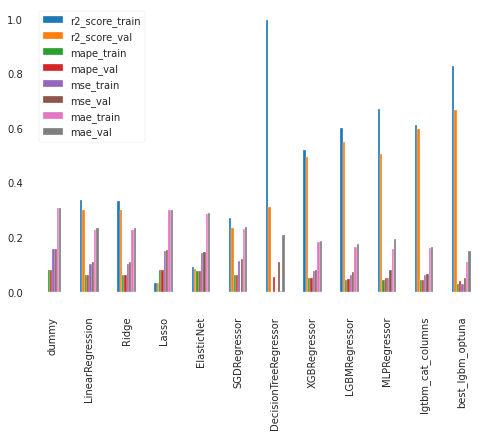

In [106]:
df_results.transpose()[["r2_score_train", "r2_score_val",
                     "mape_train", "mape_val",
                     "mse_train", "mse_val",
                     "mae_train", "mae_val"]].plot.bar();

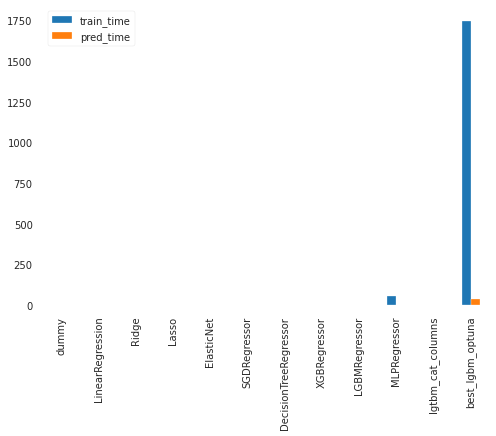

In [113]:
df_results.transpose()[["train_time", "pred_time"]].plot.bar();

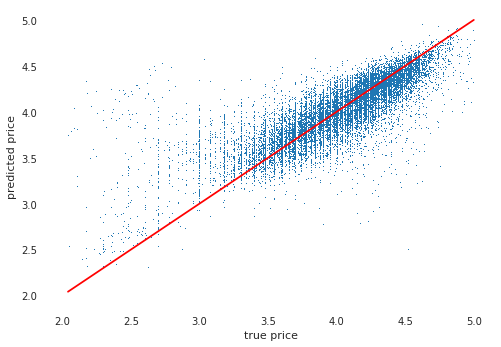

In [114]:
plt.plot(y_val, y_pred_2_val, ',')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red')
plt.xlabel('true price')
plt.ylabel('predicted price');

## Conclusion and Next steps

- Is your model good enough?
- Can you deploy it?
- What other things should you consider?
- What are your next steps?